In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
assessments = pd.read_csv('./OULAD/assessments.csv')
studentAssessment = pd.read_csv('./OULAD/studentAssessment.csv')
studentInfo = pd.read_csv('./OULAD/studentInfo.csv')

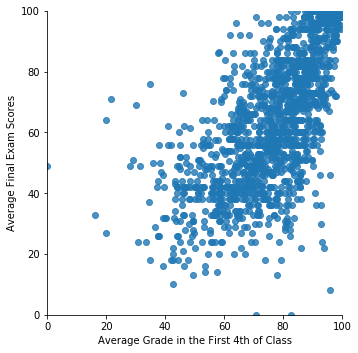

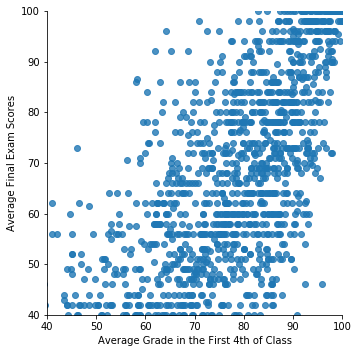

In [4]:
ehw = []
hw = []
for name, group in assessments.groupby('code_module'):
    t = np.array_split(group,4)[0]
    if (t['assessment_type'] == 'Exam').any():
        ehw.append(t)
    else:
        hw.append(t)
ehw = pd.concat(ehw)
hw = pd.concat(hw)

ehw_student = pd.merge(ehw[ehw['assessment_type'] != 'Exam'],studentAssessment, on='id_assessment')
hw_student = pd.merge(hw,studentAssessment,on='id_assessment')

ehw_means = ehw_student.groupby('id_student').score.mean()
hw_means = hw_student.groupby('id_student').score.mean()

hw_mod_types = hw.code_module.unique()
ehw_mod_types = ehw.code_module.unique()

hw_assessments = assessments[assessments['code_module'].isin(hw_mod_types)]
ehw_assessments = assessments[assessments['code_module'].isin(ehw_mod_types)]

hw_exams = hw_assessments[hw_assessments['assessment_type'] == 'Exam']
ehw_exams = ehw_assessments[ehw_assessments['assessment_type'] == 'Exam']

hw_exams_student = pd.merge(hw_exams,studentAssessment,on='id_assessment')
ehw_exams_student = pd.merge(ehw_exams,studentAssessment,on='id_assessment')

hw_exams_means = hw_exams_student.groupby('id_student').score.mean()
#ehw_exams_means = ehw_exams_student.groupby('id_student').score.mean()

dict_means = {'id_student':list(hw_means.index),'Average Grade in the First 4th of Class':list(hw_means)}
means_frame = pd.DataFrame(dict_means)
dict_exams_means = {'id_student':list(hw_exams_means.index),'Average Final Exam Scores':list(hw_exams_means)}
exams_means_frame = pd.DataFrame(dict_exams_means)

hw_points = pd.merge(means_frame, exams_means_frame, on='id_student')

g = sns.lmplot('Average Grade in the First 4th of Class', 'Average Final Exam Scores', data=hw_points, fit_reg=False)
g.set(xlim=(0,100), ylim=(0,100))

g = sns.lmplot('Average Grade in the First 4th of Class', 'Average Final Exam Scores', data=hw_points, fit_reg=False)
g.set(xlim=(40,100), ylim=(40,100))